<a href="https://colab.research.google.com/github/Ayushi2280/Ayushi/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
#importing libraries
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#creating a list for stock symbols/stickers
stock_list = ['ADANIPORTS.NS','ARVIND.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS','CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GILLETTE.NS', 'GOKEX.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'IBREALEST.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS',  'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS',  'TCS.NS', 'TATACONSUM.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS','WIPRO.NS']

In [ ]:
#start and end date for obtaining historical data
stockStartDate = '2010-11-04'
today = datetime.today().strftime('%Y-%m-%d')

In [ ]:
#downloading historical data
data = yf.download(stock_list, stockStartDate, today)['Adj Close']
print(data)

[*********************100%***********************]  53 of 53 completed
            ADANIPORTS.NS   ARVIND.NS  ...      UPL.NS    WIPRO.NS
Date                                   ...                        
2010-11-04     151.755402   17.963022  ...  123.952675  146.501968
2010-11-08     151.943710   18.721390  ...  122.698860  144.640259
2010-11-09     152.743896   19.078272  ...  120.482819  144.791229
2010-11-10     150.531555   19.687943  ...  120.891037  146.434845
2010-11-11     146.295227   19.658203  ...  119.316475  143.784912
...                   ...         ...  ...         ...         ...
2021-12-02     739.099976  116.500000  ...  698.200012  646.799988
2021-12-03     737.450012  116.849998  ...  712.750000  640.750000
2021-12-06     723.450012  112.199997  ...  716.549988  624.500000
2021-12-07     744.700012  116.500000  ...  726.950012  632.400024
2021-12-08     761.400024  115.300003  ...  728.099976  641.700012

[2733 rows x 53 columns]


In [ ]:
#calculating daily_returns, mean and variance of annual returns
daily_returns = data.pct_change()
annual_mean_returns = daily_returns.mean() * 252
annual_return_variance = daily_returns.var() * 252

In [ ]:
#storing them in a dataframe
stocks = pd.DataFrame(data.columns, columns=['Stock_Symbols'])
stocks['Variances'] = annual_return_variance.values
stocks['Returns'] = annual_mean_returns.values
stocks

,Stock_Symbols,Variances,Returns
0,ADANIPORTS.NS,0.148161,0.223012
1,ARVIND.NS,0.222065,0.281297
2,ASIANPAINT.NS,0.067974,0.268865
3,AXISBANK.NS,0.135236,0.150494
4,BAJAJ-AUTO.NS,0.067534,0.127333
5,BAJAJFINSV.NS,0.124020,0.397079
6,BAJFINANCE.NS,0.137985,0.494107
7,BHARTIARTL.NS,0.106052,0.138067
8,BPCL.NS,0.123111,0.214469
9,BRITANNIA.NS,0.069327,0.310507


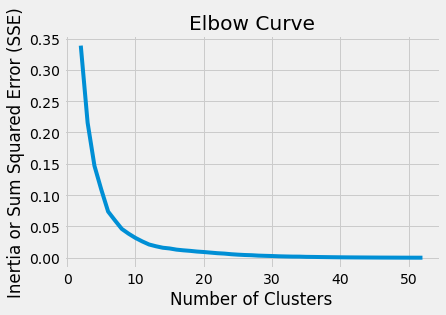

In [ ]:
#plotting elbow curve to determine the number of clusters
x = stocks[['Returns', 'Variances']].values
inertia_list = []
for k in range(2, 53):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(x)
  inertia_list.append(kmeans.inertia_)

plt.plot(range(2,53), inertia_list)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia or Sum Squared Error (SSE)')
plt.show()

In [ ]:
pip install kneed

In [ ]:
#number of clusters
from kneed import KneeLocator
clusters_iterations = range(2, 53)
kl = KneeLocator(clusters_iterations, inertia_list, curve="convex", direction="decreasing")
elbow=kl.elbow
print('Elbow = {}'.format(elbow))

Elbow = 9


In [ ]:
#cluster labels
kmeans = KMeans(n_clusters=elbow).fit(x)
labels = kmeans.labels_
labels

array([6, 6, 1, 5, 3, 4, 4, 3, 6, 1, 3, 8, 1, 3, 1, 3, 2, 0, 1, 0, 7, 3,
       5, 7, 2, 0, 5, 7, 3, 3, 6, 7, 3, 3, 0, 7, 8, 8, 3, 0, 0, 3, 1, 0,
       6, 5, 5, 7, 1, 1, 7, 6, 0], dtype=int32)

In [ ]:
#adding cluster labels to dataframe
stocks['Cluster_Labels'] = labels
stocks

,Stock_Symbols,Variances,Returns,Cluster_Labels
0,ADANIPORTS.NS,0.148161,0.223012,6
1,ARVIND.NS,0.222065,0.281297,6
2,ASIANPAINT.NS,0.067974,0.268865,1
3,AXISBANK.NS,0.135236,0.150494,5
4,BAJAJ-AUTO.NS,0.067534,0.127333,3
5,BAJAJFINSV.NS,0.124020,0.397079,4
6,BAJFINANCE.NS,0.137985,0.494107,4
7,BHARTIARTL.NS,0.106052,0.138067,3
8,BPCL.NS,0.123111,0.214469,6
9,BRITANNIA.NS,0.069327,0.310507,1


In [ ]:
#importing additional libraries
import seaborn as sns

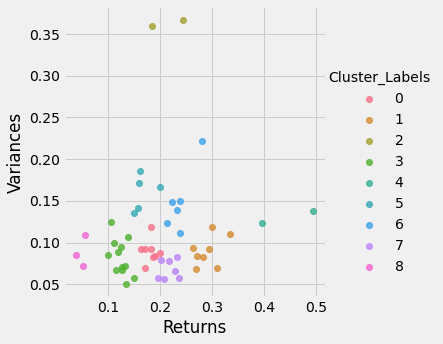

In [ ]:
#plotting the kmeans cluster graph
facet = sns.lmplot(data=stocks, x='Returns', y='Variances', hue='Cluster_Labels', fit_reg=False, legend=True)

In [ ]:
#determing the cluster centres
clusters_centers_df=pd.DataFrame(kmeans.cluster_centers_,columns=['Returns','Variances'])
clusters_centers_df

,Returns,Variances
0,0.180973,0.089797
1,0.290777,0.089912
2,0.214722,0.363293
3,0.124103,0.082024
4,0.445593,0.131003
5,0.165704,0.160108
6,0.238245,0.148954
7,0.217088,0.068227
8,0.049055,0.088938


In [ ]:
y_kmeans = kmeans.predict(x)
clustering_result=pd.DataFrame(zip(y_kmeans,stocks.index),columns=['Cluster','Company'])
clustering_result.set_index('Cluster').head()

In [ ]:
for cluster_num in list(clustering_result.set_index('Cluster').index.unique()):
    print(clustering_result.set_index('Cluster').loc[cluster_num].head())

In [ ]:
clusters_centers_df['Count']=clustering_result['Cluster'].value_counts().to_frame().rename(columns={'Cluster':'Count'})['Count']
clusters_centers_df.head()

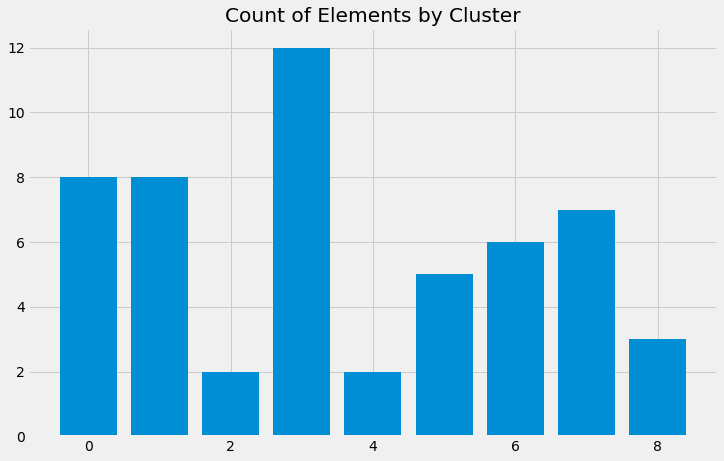

In [ ]:
#visualizing count of elements by cluster 
plt.figure(figsize=(11,7))
plt.bar(clusters_centers_df.index.values,clusters_centers_df['Count'])
plt.title("Count of Elements by Cluster")
plt.show()

In [ ]:
#suggested stocks for diversifying
def diversed_port():
  for i in range(0, elbow):
    symbol = stocks[stocks['Cluster_Labels'] == i].head(1)
    print(symbol[['Stock_Symbols', 'Cluster_Labels']]) 
diversed_port()

   Stock_Symbols  Cluster_Labels
17     GRASIM.NS               0
   Stock_Symbols  Cluster_Labels
2  ASIANPAINT.NS               1
   Stock_Symbols  Cluster_Labels
16      GOKEX.NS               2
   Stock_Symbols  Cluster_Labels
4  BAJAJ-AUTO.NS               3
   Stock_Symbols  Cluster_Labels
5  BAJAJFINSV.NS               4
  Stock_Symbols  Cluster_Labels
3   AXISBANK.NS               5
   Stock_Symbols  Cluster_Labels
0  ADANIPORTS.NS               6
   Stock_Symbols  Cluster_Labels
20   HDFCBANK.NS               7
   Stock_Symbols  Cluster_Labels
11  COALINDIA.NS               8
